In [1]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
import mglearn

In [3]:
import mglearn.datasets


X, y = mglearn.datasets.make_wave(n_samples=40)

In [4]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
reg = KNeighborsRegressor(n_neighbors=3)

In [9]:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [10]:
print(f"Test set preditctions: \n{reg.predict(X_test)}")

Test set preditctions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [11]:
reg.score(X_test, y_test)

0.8344172446249605

In [13]:
import matplotlib.pyplot as plt
import numpy as np

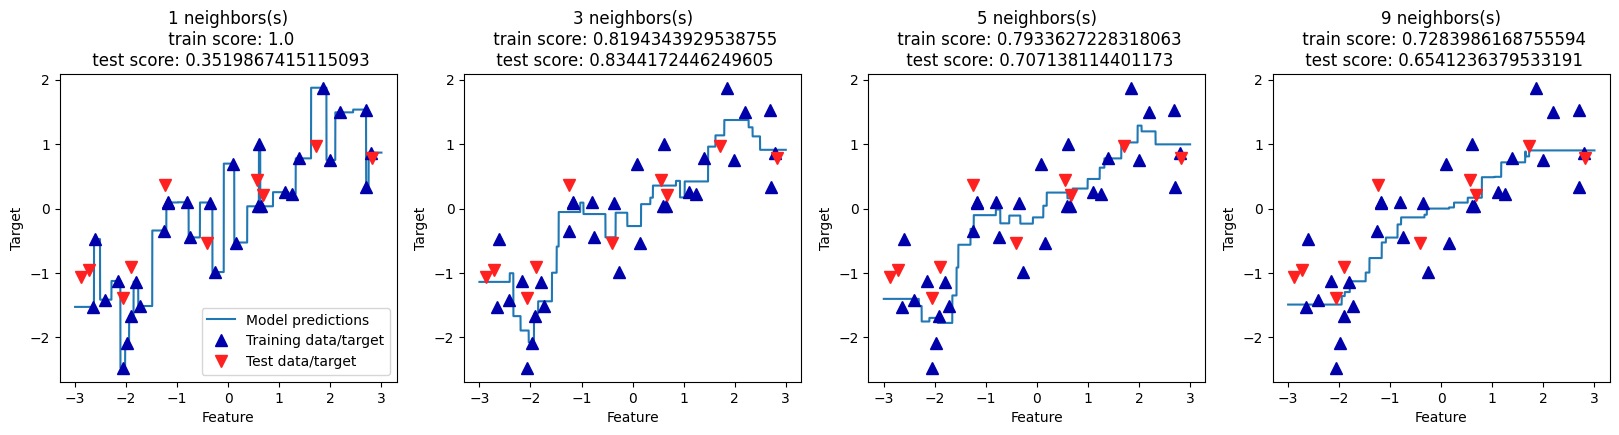

In [28]:
# neighborの数に対するモデルのscore

fig, axes = plt.subplots(1, 4, figsize=(20, 4))
# -3と3の間に1000個の値を作る(等間隔)
line = np.linspace(-3, 3, 10000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 5, 9], axes):
    # 1, 3, 9近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))  # これが各点における予想結果
    # ^はtrainデータ
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    # vはtestデータ
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        f"{n_neighbors} neighbors(s)\n train score: {reg.score(X_train, y_train)}\n test score: {reg.score(X_test, y_test)}",
    )

    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")